In [1]:
# Assumes that you have mounted /home/nubots/NUbots in the docker container as the root of the github repository.
# We need to work inside the voice2json stuff.
%cd /home/nubots/NUbots/docker/voice2json
# Todo: move into the Dockerfile
! sudo pip install pandas
! sudo pip install textdistance
! sudo pip install matplotlib

from pathlib import Path
from typing import List, Any
from textdistance import jaccard
from platform import machine

import argparse
import os
import platform
import yaml
import pandas as pd
import re


import voice2json.transcribe
import voice2json.__main__ as main

yaml.SafeLoader.add_constructor("!env", main.env_constructor)

/home/nubots/NUbots/docker/voice2json


In [2]:
# Run train-profile.

async def run_voice2json_command(method, args):
    args.machine = machine()
    args.profile = None # Essentially this: '/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/'
    args.base_directory = Path(os.environ.get('voice2json_dir', os.getcwd()))
    args.certfile = None
    args.setting = []
    args.keyfile = None

    core = await main.get_core(args)
    try:
        await method(args, core)
    finally:
        await core.stop()

async def train_profile():
    args = argparse.Namespace()
    args.command = 'train-profile'
    await run_voice2json_command(main.train, args)

async def transcribe_wav(files: List[Any], open: bool = False):
    args = argparse.Namespace()
    args.command = 'transcribe-wav'
    args.open = open
    args.no_auto_train = True
    args.debug = False
    args.relative_directory = None
    args.wav_file = [str(f) for f in files]
    args.stdin_files = None
    args.input_size = None
    old_value = os.environ['KALDI_DIR']
    os.environ['KALDI_DIR'] = ''

    result = []

    def my_print_json(object):
        result.append(object)

    old_print_json = voice2json.transcribe.print_json
    voice2json.transcribe.print_json = my_print_json

    try:
        await run_voice2json_command(main.transcribe_wav, args)
    finally:
        os.environ['KALDI_DIR'] = old_value
        voice2json.transcribe.old_print_json = my_print_json
    return result

In [3]:
await train_profile()

Skipping /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/custom_words.txt (does not exist)
Missing word 'moravec's'
Missing word '\'
Missing word 'yonge'
Missing word 'self-driving'
Missing word 'nanobot'
Missing word 'chatbot'
Missing word 'ai's'
Missing word 'neaten'
Missing word 'skyler'


/opt/kaldi/egs/wsj/s5/utils/prepare_lang.sh /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict <unk> /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/lang /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang
Checking /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict/silence_phones.txt ...
--> reading /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict/silence_phones.txt
--> text seems to be UTF-8 or ASCII, checking whitespaces
--> text contains only allowed whitespaces
--> /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict/silence_phones.txt is OK

Checking /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict/optional_silence.txt ...
--> reading /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/dict/optional_silence.txt
--> tex

fstaddselfloops /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/phones/wdisambig_phones.int /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/phones/wdisambig_words.int 


prepare_lang.sh: validating output directory
utils/validate_lang.pl /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang
Checking existence of separator file
separator file /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/subword_separator.txt is empty or does not exist, deal in word case.
Checking /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/phones.txt ...
--> text seems to be UTF-8 or ASCII, checking whitespaces
--> text contains only allowed whitespaces
--> /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/phones.txt is OK

Checking words.txt: #0 ...
--> text seems to be UTF-8 or ASCII, checking whitespaces
--> text contains only allowed whitespaces
--> /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/words.txt is OK

Checking disjoint: silence.txt, nonsilence.txt, disambig.txt ...
--> silence.txt and nonsilence.txt are disjoint
--

arpa2fst --disambig-symbol=#0 --read-symbol-table=/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/words.txt - /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/G.fst 
LOG (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:94) Reading \data\ section.
LOG (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:149) Reading \1-grams: section.
WARNING (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:219) line 104 [-7.644009	neaten	-0.7426786] skipped: word 'neaten' not in symbol table
WARNING (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:219) line 148 [-2.056185	skyler	-5.481826] skipped: word 'skyler' not in symbol table
WARNING (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:219) line 181 [-3.473102	\	-4.532297] skipped: word '\' not in symbol table
WARNING (arpa2fst[5.5.969~3-3b8a9]:Read():arpa-file-parser.cc:219) line 198 [-6.945039	self-driving	-1.373777] skipped: word 'self-driving' not in symbol table


3.81402 -0.319756
Succeeded in formatting LM: '/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/local/lang/lm.arpa.gz'
-0.000280514 -0.00108719


fstisstochastic /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/LG.fst 
fstcomposecontext --context-size=2 --central-position=1 --read-disambig-syms=/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/phones/disambig.int --write-disambig-syms=/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/disambig_ilabels_2_1.int /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/ilabels_2_1.15015 /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/LG.fst 
fstisstochastic /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/CLG_2_1.fst 
make-h-transducer --disambig-syms-out=/home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/graph/disambig_tid.int --transition-scale=1.0 /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang/tmp/ilabels_2_1 /home/nubots/.local/share/v

-0.000280514 -0.00108719
0.205405 -0.00247998
HCLGa is not stochastic


fstisstochastic /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/graph/HCLGa.fst 
add-self-loops --self-loop-scale=0.1 --reorder=true /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/model/final.mdl /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/graph/HCLGa.fst 


/opt/kaldi/egs/wsj/s5/steps/online/nnet3/prepare_online_decoding.sh --mfcc-config /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/conf/mfcc_hires.conf /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/data/lang /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/extractor /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/model /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/online
/opt/kaldi/egs/wsj/s5/steps/online/nnet3/prepare_online_decoding.sh: preparing configuration files in /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/online/conf
/opt/kaldi/egs/wsj/s5/steps/online/nnet3/prepare_online_decoding.sh: moving /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/online/conf/online.conf to /home/nubots/.local/share/voice2json/en-us_kaldi-zamia/acoustic_model/online/conf/online.conf.bak
/opt/kaldi/egs/wsj/s5/steps/online/nnet3/prepare_online_dec

In [4]:
def find_audio_files(directory: Path, glob_pattern: str, id_pattern: str) -> List[Path]:
    return sorted(directory.glob(glob_pattern), key=lambda path: int(re.search(id_pattern, path.name)[0]))

In [9]:
wav_files = find_audio_files(Path('audio/'), 'audio-*.wav', '[0-9]+')
results = await transcribe_wav(wav_files)

,text,likelihood,transcribe_seconds,wav_seconds,tokens,wav_name,sentence,similarity
0,greet robin at the dishwasher and ask him to l...,1,0.829241,2.869687,None,audio-2.wav,greet robin at the dishwasher and ask him to l...,1.000000
1,clean bring the scrubby from the storage table,1,1.022359,2.976125,None,audio-3.wav,could you please bring the scrubby to the stor...,0.500000
2,robots clean meet linda at the desk follow her...,1,1.292673,4.097062,None,audio-4.wav,"robot please meet linda at the desk, follow he...",0.555556
3,go to the dining table meet charlie and lead h...,1,1.127312,3.700063,None,audio-5.wav,"go to the dining table, meet alex, and lead he...",0.733333
4,take michael to the dishwasher you will find h...,1,0.951609,3.402375,None,audio-6.wav,"take michael to the dishwasher, you will find ...",0.846154


<AxesSubplot:>

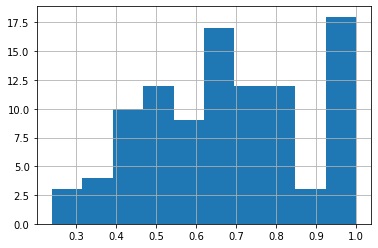

In [6]:
data = pd.DataFrame(results)
sentences = pd.read_csv('sentences.txt', header=None, sep='\n')
data['sentence'] = sentences[0].apply(lambda x: x.lower())
# Todo: consider which measure of similarity is best:
# https://itnext.io/string-similarity-the-basic-know-your-algorithms-guide-3de3d7346227
data['similarity'] = data.apply(lambda row: jaccard(row.text.split(' '), row.sentence.split(' ')), axis=1)
display(data.head())
data.similarity.hist()

In [7]:
directory = Path('voice_samples_wav')
commands = pd.read_json(directory / 'commands.json')
commands.index = commands.Id
wav_files = find_audio_files(directory, 'voice_*.wav', '[0-9]+')
results = await transcribe_wav(wav_files)

,text,likelihood,transcribe_seconds,wav_seconds,tokens,wav_name,Id,sentence,similarity
Id,,,,,,,,,
1,follow the elders in the women in the dining r...,1,0.802947,2.904,None,voice_1.wav,1,follow the oldest woman in the dining room please,0.400000
2,grasp the orange pick pointing paprika in the ...,1,1.289741,5.232,None,voice_2.wav,2,"grasp the orange, pinpoint a paprika in the li...",0.333333
3,serve snacks grape juice in the cup,1,0.625320,2.136,None,voice_3.wav,3,serve some grape juice in a cup,0.555556
4,give cloth to the corridor are door,1,0.526850,1.608,None,voice_4.wav,4,close the corridor door,0.375000
5,robot police escort the end table follow his t...,1,1.100488,4.440,None,voice_5.wav,5,robot please escort the tallest person in the ...,0.550000


<AxesSubplot:>

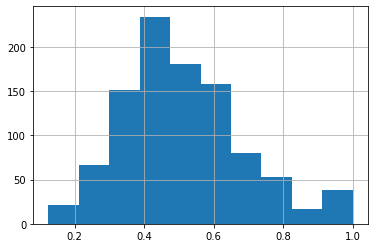

In [8]:
data = pd.DataFrame(results)
data['Id'] = data.wav_name.apply(lambda name: int(re.search('[0-9]+', name)[0]))
data.index = data.Id
data['sentence'] = commands.Sentence.apply(lambda row: row.lower())
data['similarity'] = data.apply(lambda row: jaccard(row.text.split(' '), row.sentence.split(' ')), axis=1)
display(data.head())
data.similarity.hist()